In [1]:
# import dependencies
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect
import seaborn as sns

%matplotlib inline

In [2]:
# setup SQL database connection
Base = automap_base()
engine = create_engine('sqlite:///../data/fbdata.sqlite')
Base.metadata.create_all(engine)
Base.prepare(engine, reflect=True)
session = Session(engine)

In [3]:
modelTrainTest = pd.read_sql_query("SELECT * FROM modelTrainTest", con=engine)
selectedFeaturesDF = modelTrainTest[['height', 'weight', '40yard',
       'vertleap', 'broadjump', 'playsPerGame', 
       'rushAvg', 'ydsFromScrimAvg', 'compPct', 'ydsPerAtt', 'adjYdsPerAtt',
       'effRate', 'success']]
selectedFeaturesDF

,height,weight,40yard,vertleap,broadjump,playsPerGame,rushAvg,ydsFromScrimAvg,compPct,ydsPerAtt,adjYdsPerAtt,effRate,success
0,76.300,213.0,4.75,NaN,NaN,2.800000,-2.6,-2.4,61.3,9.0,8.7,152.9,1.0
1,75.000,212.0,4.95,28.0,108.0,4.406250,-3.4,-3.4,56.8,7.0,6.1,120.2,0.0
2,73.400,190.0,4.74,30.5,117.0,5.083333,0.9,1.0,55.2,6.6,5.7,116.4,1.0
3,74.300,203.0,NaN,NaN,NaN,4.448980,1.4,1.4,62.4,8.8,8.2,145.6,1.0
4,75.000,191.0,4.82,29.5,111.0,5.909091,2.2,2.2,51.9,7.7,6.4,122.2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,76.875,224.0,NaN,NaN,NaN,2.766667,-3.8,-3.8,61.8,8.8,8.8,148.4,0.0
246,73.625,212.0,4.99,28.0,102.0,3.600000,-1.5,-1.5,68.1,8.9,9.3,161.7,0.0
247,74.625,218.0,5.0,28.0,99.0,3.918367,1.7,1.9,63.0,6.9,6.9,134.7,0.0
248,72.625,222.0,4.84,30.5,104.0,10.744681,2.3,2.3,64.3,8.5,8.8,155.2,0.0


In [4]:
# look at some correlation
corr = selectedFeaturesDF.corr()
corr.style.background_gradient(cmap='coolwarm')

,height,weight,vertleap,broadjump,playsPerGame,rushAvg,ydsFromScrimAvg,compPct,ydsPerAtt,adjYdsPerAtt,effRate,success
height,1,0.604867,-0.226084,-0.115732,-0.267569,-0.231856,-0.222582,0.0533123,-0.15432,-0.0672248,-0.047108,0.0495812
weight,0.604867,1,0.070684,0.0906593,-0.0159297,0.0524636,0.0512756,0.0948851,-0.0073079,0.118378,0.100526,0.01764
vertleap,-0.226084,0.070684,1,0.760827,0.477107,0.539149,0.538297,0.0774538,0.213127,0.231656,0.194813,0.177422
broadjump,-0.115732,0.0906593,0.760827,1,0.487826,0.54474,0.541115,0.10122,0.170396,0.197476,0.169614,0.194551
playsPerGame,-0.267569,-0.0159297,0.477107,0.487826,1,0.70353,0.685496,0.0728487,0.186825,0.19105,0.159246,0.135315
rushAvg,-0.231856,0.0524636,0.539149,0.54474,0.70353,1,0.990185,0.0674544,0.172653,0.203673,0.169429,0.187493
ydsFromScrimAvg,-0.222582,0.0512756,0.538297,0.541115,0.685496,0.990185,1,0.0697583,0.163985,0.198807,0.16631,0.200371
compPct,0.0533123,0.0948851,0.0774538,0.10122,0.0728487,0.0674544,0.0697583,1,0.512565,0.617181,0.770804,0.112934
ydsPerAtt,-0.15432,-0.0073079,0.213127,0.170396,0.186825,0.172653,0.163985,0.512565,1,0.930117,0.895045,0.130353
adjYdsPerAtt,-0.0672248,0.118378,0.231656,0.197476,0.19105,0.203673,0.198807,0.617181,0.930117,1,0.966007,0.137774


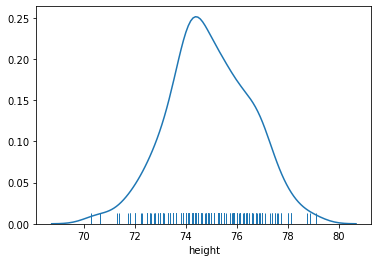

In [5]:
sns.distplot(selectedFeaturesDF['height'], hist = False, rug = True)


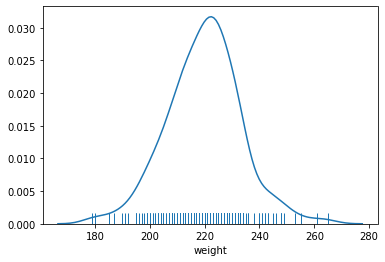

In [6]:
sns.distplot(selectedFeaturesDF['weight'], hist = False, rug = True)

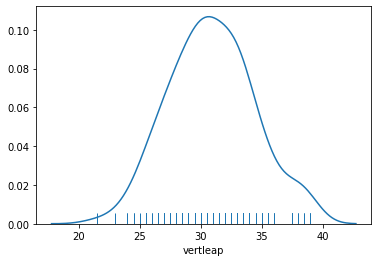

In [19]:
sns.distplot(selectedFeaturesDF['vertleap'], hist = False, rug = True)

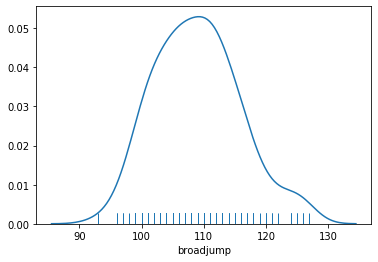

In [8]:
sns.distplot(selectedFeaturesDF['broadjump'], hist = False, rug = True)

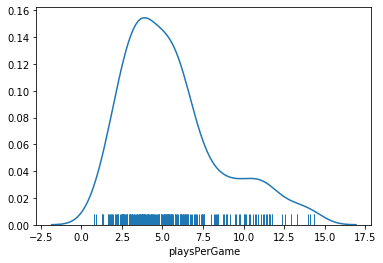

In [9]:
sns.distplot(selectedFeaturesDF['playsPerGame'], hist = False, rug = True)

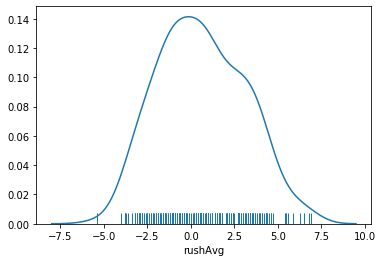

In [10]:
sns.distplot(selectedFeaturesDF['rushAvg'], hist = False, rug = True)

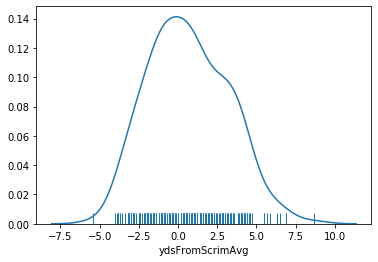

In [11]:
sns.distplot(selectedFeaturesDF['ydsFromScrimAvg'], hist = False, rug = True)

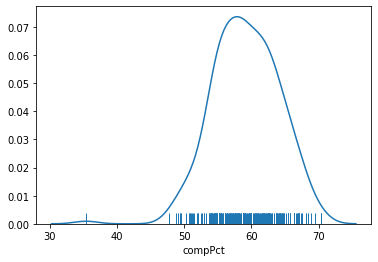

In [12]:
sns.distplot(selectedFeaturesDF['compPct'], hist = False, rug = True)

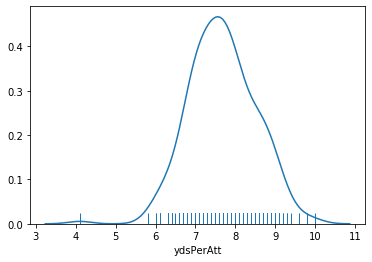

In [13]:
sns.distplot(selectedFeaturesDF['ydsPerAtt'], hist = False, rug = True)

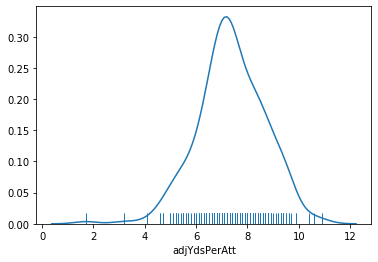

In [14]:
sns.distplot(selectedFeaturesDF['adjYdsPerAtt'], hist = False, rug = True)

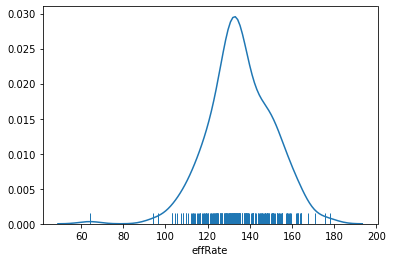

In [15]:
sns.distplot(selectedFeaturesDF['effRate'], hist = False, rug = True)

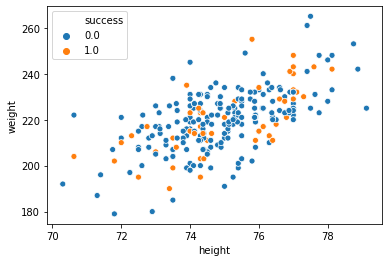

In [18]:
sns.scatterplot(selectedFeaturesDF['height'], selectedFeaturesDF['weight'], hue =selectedFeaturesDF['success'] )

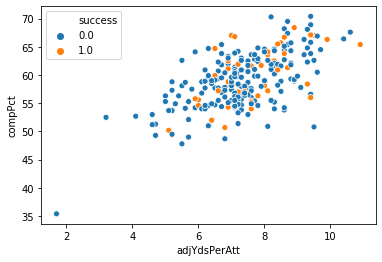

In [20]:
sns.scatterplot(selectedFeaturesDF['adjYdsPerAtt'], selectedFeaturesDF['compPct'], hue =selectedFeaturesDF['success'] )

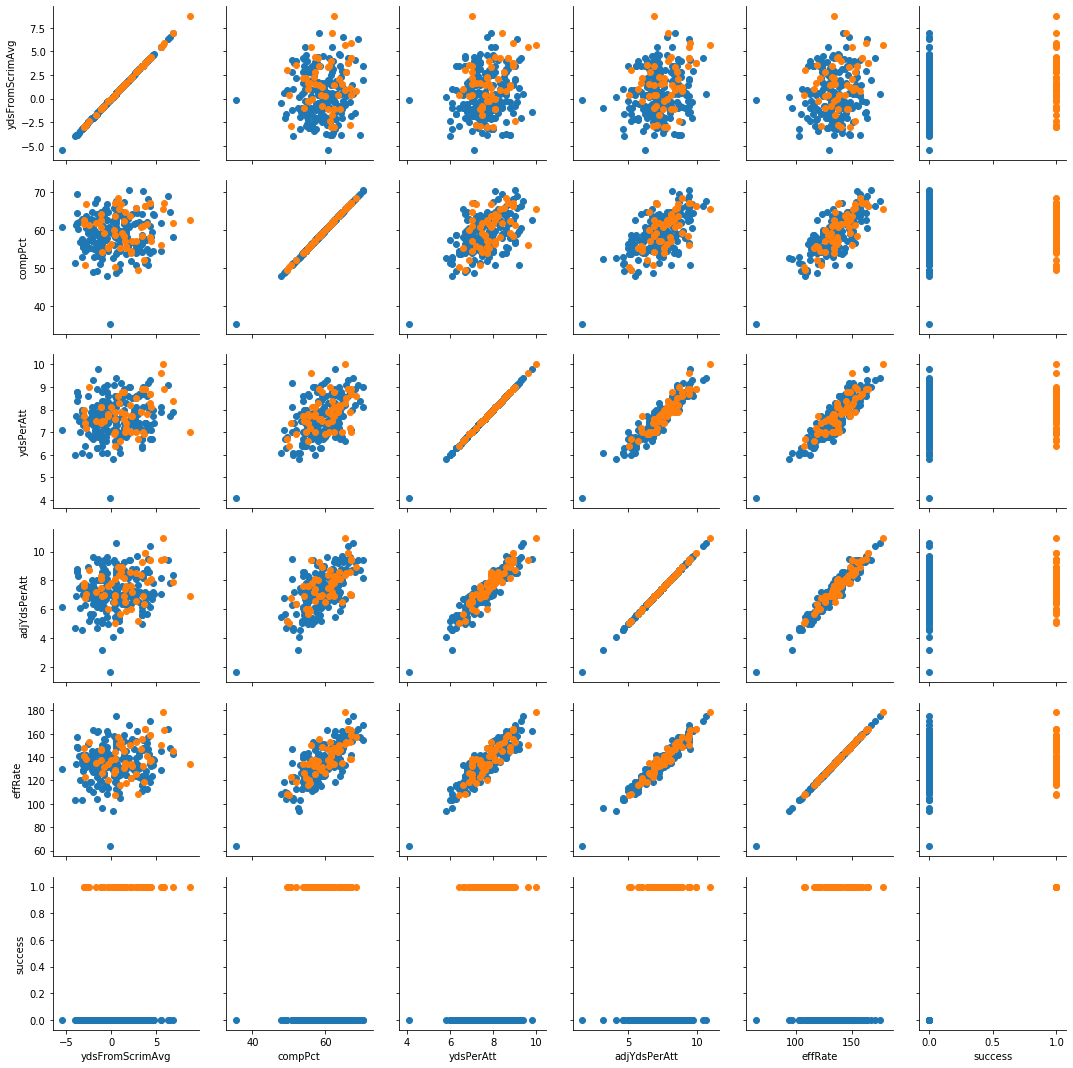

In [24]:
subSet=selectedFeaturesDF[['ydsFromScrimAvg', 'compPct', 'ydsPerAtt', 'adjYdsPerAtt',
       'effRate', 'success']]

g=sns.PairGrid(subSet, hue ='success')
g.map(plt.scatter);